## Covid-19 Data Project Overview:


The Covid-19 Pandemic had a profound worldwide impact, leading to extensive loss of life and significant disruptions to people's daily lives. It is essential to analyze Covid-19 data to anticipate potential outcomes in future pandemics and evaluate the genuine effectiveness of vaccines in protecting human lives. Utilizing data analysis can provide valuable insights into this critical phenomenon. In the following sections, we will apply these analytical skills for this purpose. It's important to emphasize that these datasets have been anonymized to ensure that the privacy of individuals is respected.

### Essential information we can derive from global Covid-19 data:

* Exploring the available information
* Preparing data for analysis
* Assessing the number of Covid-19 cases by country
* Determining the proportion of fully vaccinated individuals in each continent
* Evaluating the effects of vaccination 

### Analyzing Covid-19 Data Using Python 

I utilized a Covid-19 dataset sourced from the `Our World in Data Organization`. This dataset receives regular updates, ensuring that we have access to up-to-date information for our analysis.

**Analyzing the data sets:**


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression 
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import GradientBoostingRegressor


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df_d = pd.read_csv('/Users/zoewalp/Desktop/DataScienceDataSets/CovidDeaths1a.csv')
df_v = pd.read_csv('/Users/zoewalp/Desktop/DataScienceDataSets/CovidVaccinations1a.csv')


**Looking at each data table:**

In [2]:
df_d.head()


,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,2020-01-03,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_v.head()

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 41,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN


### Meta Data Exploration -- Examining the Schema 

Here I am reviewing the datatypes and noting
any instances of missing data. I will also investigate data dimensions and adjust datatypes when appropriate.

In [4]:
df_d.info()
df_d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330736 entries, 0 to 330735
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   iso_code                            330736 non-null  object 
 1   continent                           315032 non-null  object 
 2   location                            330736 non-null  object 
 3   date                                330736 non-null  object 
 4   population                          330736 non-null  float64
 5   total_cases                         293300 non-null  float64
 6   new_cases                           321633 non-null  float64
 7   new_cases_smoothed                  320374 non-null  float64
 8   total_deaths                        272174 non-null  float64
 9   new_deaths                          321702 non-null  float64
 10  new_deaths_smoothed                 320472 non-null  float64
 11  total_cases_per_million   

,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
count,3.307360e+05,2.933000e+05,3.216330e+05,3.203740e+05,2.721740e+05,321702.000000,320472.000000,293300.000000,321633.000000,320374.000000,...,320472.000000,184817.000000,37031.000000,37031.000000,38043.000000,38043.000000,9895.000000,9895.000000,22657.000000,22657.000000
mean,1.281512e+08,6.253904e+06,1.013110e+04,1.016799e+04,8.357613e+04,91.896227,92.240686,95300.478343,153.109948,153.681658,...,0.962885,0.911495,683.826875,16.500492,3978.756933,132.179674,349.526124,10.578607,4370.568257,87.308765
std,6.597824e+08,3.854149e+07,1.134175e+05,9.718695e+04,4.293215e+05,761.899876,597.590018,145463.270075,1196.206835,616.176235,...,2.843081,0.399925,2190.900689,23.158904,10079.521317,154.130081,532.561792,13.962077,11177.309650,89.884712
min,4.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.490020e+05,7.474000e+03,0.000000e+00,5.710000e-01,1.250000e+02,0.000000,0.000000,2273.895000,0.000000,0.120000,...,0.000000,0.720000,22.000000,2.696000,199.000000,34.377000,23.000000,2.001000,250.000000,26.183000
50%,5.882259e+06,6.538100e+04,4.000000e+00,3.007150e+01,1.250000e+03,0.000000,0.143000,24535.964500,0.366000,8.249000,...,0.021000,0.950000,98.000000,7.140000,785.000000,80.220000,118.000000,5.409000,904.000000,61.432000
75%,2.830170e+07,6.940385e+05,3.160000e+02,5.622860e+02,1.116475e+04,3.000000,5.857000,122228.212250,41.737000,92.141750,...,0.664000,1.140000,442.000000,20.517000,3056.500000,168.497000,443.000000,13.786000,4062.000000,116.852000
max,7.975105e+09,7.689823e+08,8.401763e+06,6.402721e+06,6.953730e+06,121590.000000,18214.143000,737554.506000,228872.025000,37241.781000,...,148.641000,5.870000,28891.000000,180.675000,154497.000000,1526.846000,4838.000000,224.976000,153977.000000,708.405000


In [5]:
df_v.info()
df_v.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330736 entries, 0 to 330735
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    330736 non-null  object 
 1   continent                                   315032 non-null  object 
 2   location                                    330736 non-null  object 
 3   date                                        330736 non-null  object 
 4   total_tests                                 79387 non-null   float64
 5   new_tests                                   75403 non-null   float64
 6   total_tests_per_thousand                    79387 non-null   float64
 7   new_tests_per_thousand                      75403 non-null   float64
 8   new_tests_smoothed                          103965 non-null  float64
 9   new_tests_smoothed_per_thousand             103965 non-null  float64
 

,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 41,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,7.938700e+04,7.540300e+04,79387.000000,75403.000000,1.039650e+05,103965.000000,95927.000000,9.434800e+04,7.737900e+04,7.409900e+04,...,189676.000000,125574.000000,226300.000000,304205.000000,248503.000000,0.0,1.150700e+04,11507.000000,11507.000000,11507.000000
mean,2.110457e+07,6.728541e+04,924.254762,3.272466,1.421784e+05,2.826309,0.098163,2.403633e+03,4.106196e+08,1.827601e+08,...,32.909824,50.789757,3.097055,73.716018,0.722476,NaN,4.941510e+04,9.634079,11.862501,1590.333423
std,8.409869e+07,2.477340e+05,2195.428504,9.033843,1.138215e+06,7.308233,0.115978,3.344366e+04,1.508210e+09,6.655182e+08,...,13.574550,31.957035,2.548358,7.396609,0.148990,NaN,1.413973e+05,12.489173,25.631268,1894.243487
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,...,7.700000,1.188000,0.100000,53.280000,0.394000,NaN,-3.772610e+04,-44.230000,-95.920000,-2142.340300
25%,3.646540e+05,2.244000e+03,43.585500,0.286000,1.486000e+03,0.203000,0.017000,7.100000e+00,1.566566e+06,8.693195e+05,...,22.600000,20.859000,1.300000,69.590000,0.602000,NaN,7.220000e+01,1.060000,-1.470000,46.039142
50%,2.067330e+06,8.783000e+03,234.141000,0.971000,6.570000e+03,0.851000,0.055000,1.750000e+01,1.138233e+07,5.951492e+06,...,33.100000,49.839000,2.500000,75.050000,0.740000,NaN,5.387701e+03,7.950000,6.040000,1019.640260
75%,1.024845e+07,3.722900e+04,894.374500,2.914000,3.220500e+04,2.584000,0.138100,5.460000e+01,8.746193e+07,4.177938e+07,...,41.300000,83.241000,4.200000,79.460000,0.829000,NaN,3.519805e+04,15.370000,16.990000,2612.058200
max,9.214000e+09,3.585563e+07,32925.826000,531.062000,1.476998e+07,147.603000,1.000000,1.023632e+06,1.349204e+10,5.620758e+09,...,78.100000,100.000000,13.800000,86.750000,0.957000,NaN,1.281224e+06,76.550000,377.430000,10292.468000


Here are dimensions (rows, columns) of two data sets:

In [6]:
display(df_d.shape)
display(df_v.shape)

(330736, 26)

(330736, 46)

Changing datatypes to string and datetime for both datasets:

In [7]:
#vaccine data set
df_v_columns = ['iso_code', 'continent','location','tests_units']
df_v[df_v_columns] = df_v[df_v_columns].astype('string')
print(df_v.dtypes)
df_v_datetime = ['date']
df_v[df_v_datetime]=df_v[df_v_datetime].apply(pd.to_datetime)
display(df_v.dtypes)

#death data set 

df_d_columns = ['iso_code', 'continent','location']
df_d[df_d_columns] = df_d[df_d_columns].astype('string')
print(df_d.dtypes)
df_d_datetime = ['date']
df_d[df_d_datetime]=df_d[df_d_datetime].apply(pd.to_datetime)
display(df_d.dtypes)



iso_code                                      string[python]
continent                                     string[python]
location                                      string[python]
date                                                  object
total_tests                                          float64
new_tests                                            float64
total_tests_per_thousand                             float64
new_tests_per_thousand                               float64
new_tests_smoothed                                   float64
new_tests_smoothed_per_thousand                      float64
positive_rate                                        float64
tests_per_case                                       float64
tests_units                                   string[python]
total_vaccinations                                   float64
people_vaccinated                                    float64
people_fully_vaccinated                              float64
total_boosters          

iso_code                                      string[python]
continent                                     string[python]
location                                      string[python]
date                                          datetime64[ns]
total_tests                                          float64
new_tests                                            float64
total_tests_per_thousand                             float64
new_tests_per_thousand                               float64
new_tests_smoothed                                   float64
new_tests_smoothed_per_thousand                      float64
positive_rate                                        float64
tests_per_case                                       float64
tests_units                                   string[python]
total_vaccinations                                   float64
people_vaccinated                                    float64
people_fully_vaccinated                              float64
total_boosters          

iso_code                              string[python]
continent                             string[python]
location                              string[python]
date                                          object
population                                   float64
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 f

iso_code                              string[python]
continent                             string[python]
location                              string[python]
date                                  datetime64[ns]
population                                   float64
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 f

Joining the two dataset tables. 

In [8]:
d_v_tables = pd.merge(df_d, df_v, on=['location','date'],how ='inner')
display(d_v_tables)

,iso_code_x,continent_x,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 41,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330731,ZWE,Africa,Zimbabwe,2023-07-29,16320539.0,265693.0,NaN,NaN,5712.0,1.0,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN
330732,ZWE,Africa,Zimbabwe,2023-07-30,16320539.0,265693.0,0.0,0.0,5712.0,0.0,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN
330733,ZWE,Africa,Zimbabwe,2023-07-31,16320539.0,265693.0,0.0,0.0,5712.0,0.0,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN
330734,ZWE,Africa,Zimbabwe,2023-08-01,16320539.0,265693.0,0.0,0.0,5712.0,0.0,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN


In [9]:
display(d_v_tables)

,iso_code_x,continent_x,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 41,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330731,ZWE,Africa,Zimbabwe,2023-07-29,16320539.0,265693.0,NaN,NaN,5712.0,1.0,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN
330732,ZWE,Africa,Zimbabwe,2023-07-30,16320539.0,265693.0,0.0,0.0,5712.0,0.0,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN
330733,ZWE,Africa,Zimbabwe,2023-07-31,16320539.0,265693.0,0.0,0.0,5712.0,0.0,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN
330734,ZWE,Africa,Zimbabwe,2023-08-01,16320539.0,265693.0,0.0,0.0,5712.0,0.0,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,NaN


### Count of New Covid-19 Deaths by Month:

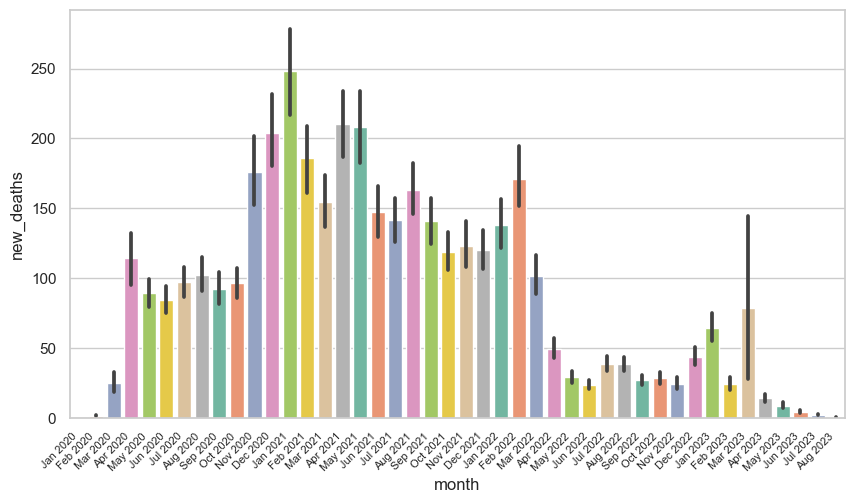

In [10]:
d_v_tables['month'] = d_v_tables['date'].dt.strftime('%b %Y')
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax=sns.barplot(x='month',y='new_deaths',data=d_v_tables,palette='Set2')
plt.xticks(rotation=45,ha='right')
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize': 8, 'fontweight': 'normal'})
plt.subplots_adjust(bottom=0.2)

### Count of New Covid-19 Cases by Month:

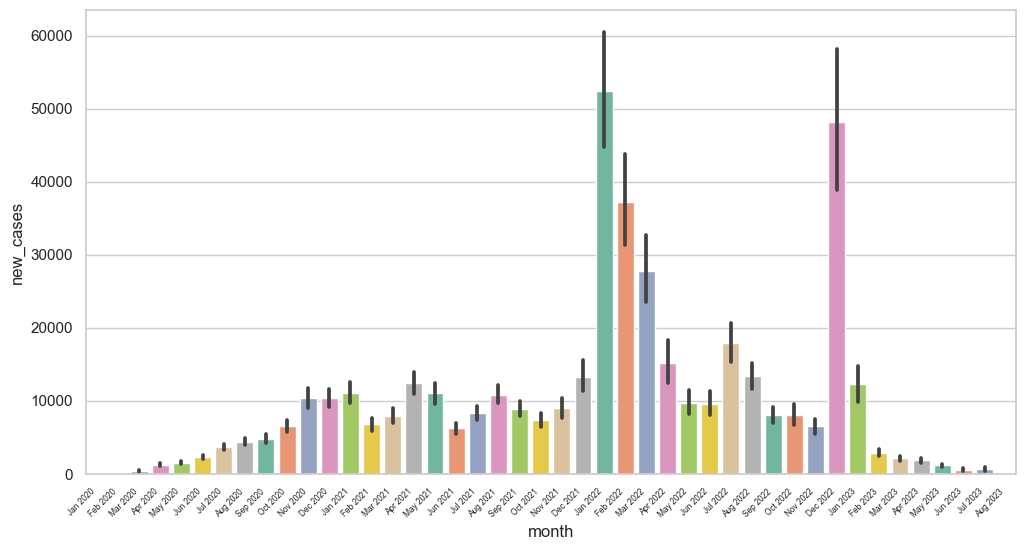

In [11]:
 
d_v_tables.dropna(subset=['new_cases'],inplace=True)

d_v_tables['new_cases']=pd.to_numeric(d_v_tables['new_cases'])
d_v_tables['month']=d_v_tables['date'].dt.strftime('%b %Y')

sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
ax=sns.barplot(x='month',y='new_cases',data=d_v_tables,palette='Set2')
plt.xticks(rotation=45,ha='right')
ax.set_xticklabels(ax.get_xticklabels(),fontdict={'fontsize':6,'fontweight': 'normal'})
plt.subplots_adjust(bottom=.3)
plt.show()

### Percentage of New Cases By Continent:

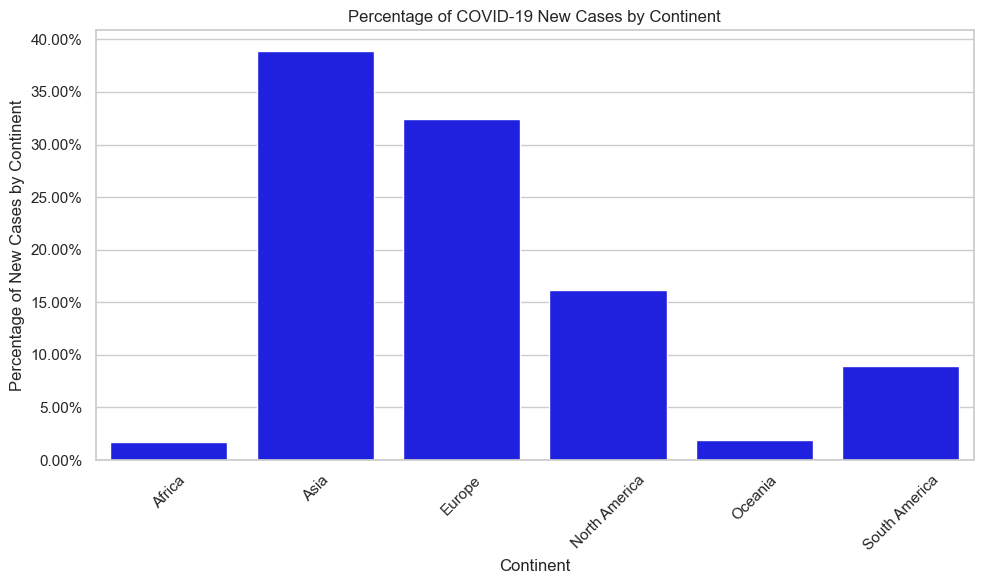

In [12]:
continent_cases_sum = d_v_tables.groupby('continent_x')['new_cases'].sum().reset_index()
total_cases = continent_cases_sum['new_cases'].sum()
continent_cases_sum['percentage_cases'] = (continent_cases_sum['new_cases'] / total_cases) * 100
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='continent_x', y='percentage_cases', data=continent_cases_sum, color='blue')
ax.set_xlabel('Continent')
ax.set_ylabel('Percentage of New Cases by Continent')
ax.set_title('Percentage of COVID-19 New Cases by Continent')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=2))
plt.tight_layout()
plt.show()

### Percentage New Deaths By Continent:

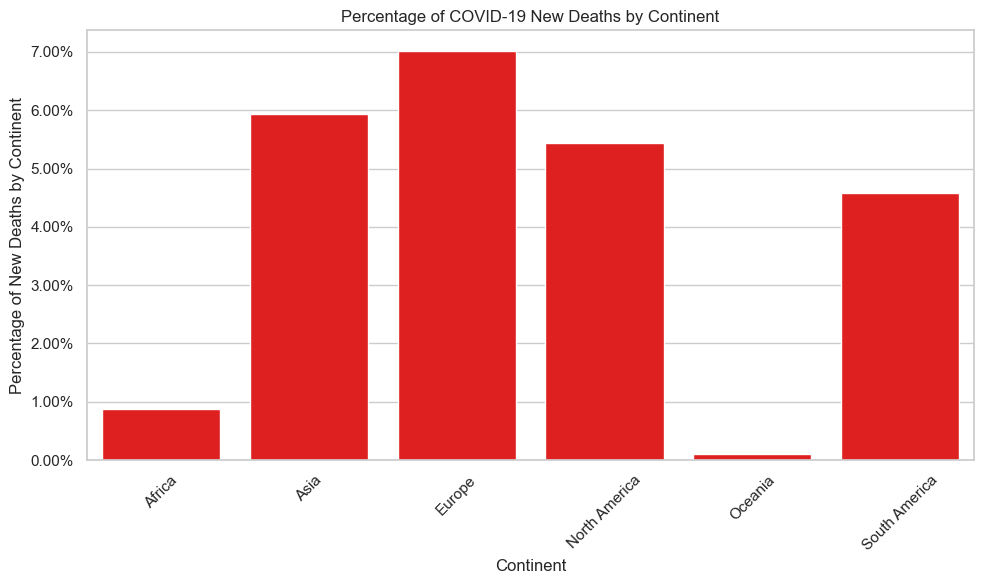

In [13]:

total_deaths = d_v_tables['new_deaths'].sum()
continent_deaths_sum = d_v_tables.groupby('continent_x')['new_deaths'].sum().reset_index()

continent_deaths_sum['percentage_deaths'] = (continent_deaths_sum['new_deaths'] / total_deaths) * 100
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='continent_x', y='percentage_deaths', data=continent_deaths_sum, color='red')
ax.set_xlabel('Continent')
ax.set_ylabel('Percentage of New Deaths by Continent')
ax.set_title('Percentage of COVID-19 New Deaths by Continent')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=2))
plt.tight_layout()
plt.show()

### Trends of People Fully Vaccinated in the United States, India, France and South Korea:

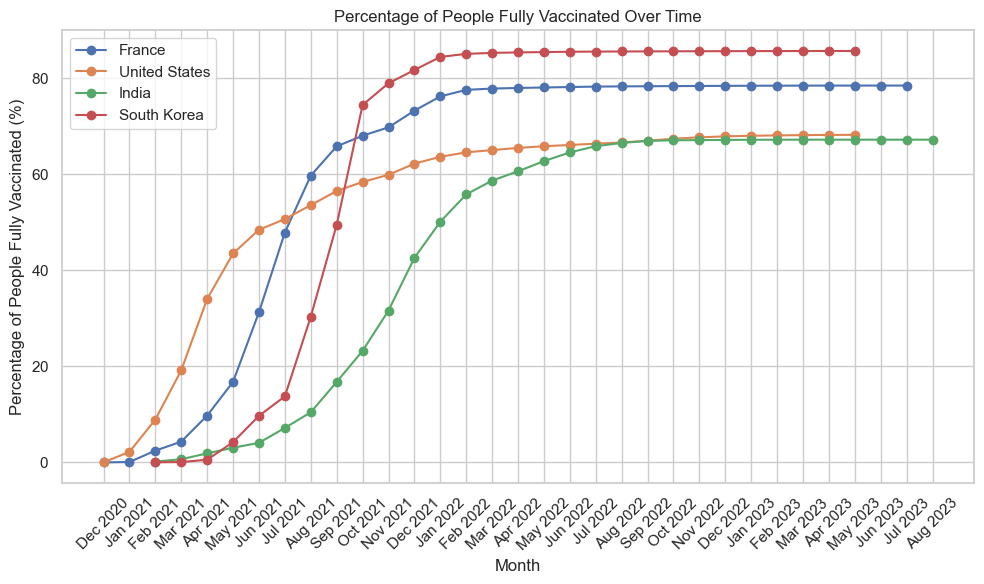

In [14]:
desired_locations = ['France', 'United States', 'India', 'South Korea']

plt.figure(figsize=(10, 6))


for desired_location in desired_locations:
    current_population = d_v_tables.loc[d_v_tables['location'] == desired_location, 'population'].values[0]
    filtered_data = d_v_tables[(d_v_tables['location'] == desired_location) & (d_v_tables['people_fully_vaccinated'] != '')].copy()
    filtered_data['rnk'] = filtered_data.groupby(['location', 'month'])['people_fully_vaccinated'].rank(method='max', ascending=False)
    ranked_data = filtered_data[(filtered_data['rnk'] == 1) & (filtered_data['location'] == desired_location)].copy()
    percentage_fully_vaccinated = (ranked_data['people_fully_vaccinated'].astype(int) / current_population) * 100
    ranked_data['percentage_fully_vaccinated'] = percentage_fully_vaccinated
    ranked_data['date'] = pd.to_datetime(ranked_data['month'], format='%b %Y')
    ranked_data = ranked_data.sort_values(by='date')
    
    plt.plot(ranked_data['month'], ranked_data['percentage_fully_vaccinated'],marker='o', label=desired_location)

plt.xlabel('Month')
plt.ylabel('Percentage of People Fully Vaccinated (%)')
plt.title('Percentage of People Fully Vaccinated Over Time')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True, useOffset=False))
plt.legend()  

plt.tight_layout()
plt.show()

### Visualization of Vaccine Distribution Over Time Across Continents with a Stacked Area Chart: 

<Figure size 1000x600 with 0 Axes>

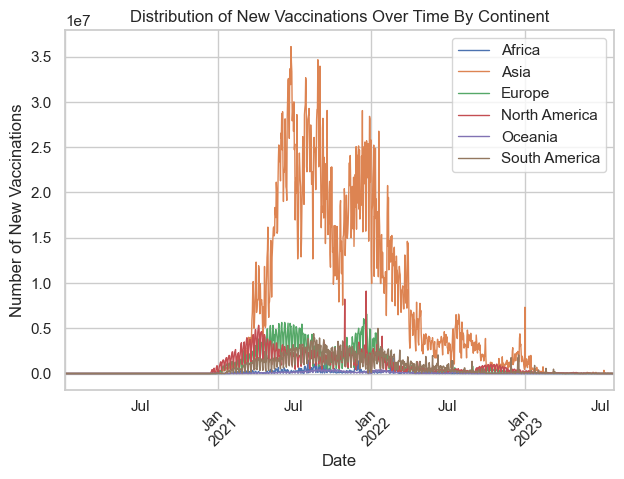

In [15]:
vaccination_data = d_v_tables.groupby(['date','continent_x'])['new_vaccinations'].sum().reset_index()
pivot_vaccination_data=vaccination_data.pivot(index='date', columns='continent_x',values='new_vaccinations')
plt.figure(figsize=(10,6))
pivot_vaccination_data.plot(kind='line',linewidth=1)
plt.xlabel('Date')
plt.ylabel('Number of New Vaccinations')
plt.title('Distribution of New Vaccinations Over Time By Continent')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### SIGNIFICANT FINDINGS

Through the successful completion of this project, I gained valuable insights into the global and country-specific effects of Covid-19. These insights were achieved through exploratory data analysis and visualization techniques, allowing for a thorough examination of data distributions and the identification of correlations among various Covid-19 variables.

### Summaries of Discoveries 
* **Deaths per Month:** The data indicates that the highest number of monthly deaths occurred in January 2021, prior to widespread vaccine distribution.
* **Cases per Month:** The early part of 2022 saw the highest number of newly recorded cases, with January registering 50,000 cases worldwide.
* **New Vaccinations Count:** Between May 2021 and December 2021, the majority of global vaccinations were administered, ranging from 1,000,000 to 1,600,000 vaccinations.
* **Percentage of Cases By Contintent** Asia reported the highest percentage of Covid-19 cases among all continents, which can be attributed to its dense population.
* **Percentage of Deaths By Continent** Europe experienced more Covid-19 deaths than Asia. Asia's success in suppressing the virus was attributed to effective non-pharmaceutical interventions, including quarantines, mask use, physical distancing, and widespread testing, as highlighted in the article titled 'Reasons for Asia-Pacific Success in Suppressing Covid-19' from the World Happiness Report.
* **Comparing Vaccinations in US, France, India and South Korea:** France witnessed a surge in vaccinations from April to September 2021. In the US, vaccination rates declined starting in May 2021. India's vaccination rates continued until January 2022 and then stabilized. South Korea initiated vaccinations in the summer of 2021, with a sharp rise, eventually reaching approximately 90% full vaccination by December 2021.
* **Vaccinations By Continent:** Most continents commenced mass vaccinations from July 2021 to January 2022. The US initiated vaccinations in January 2021.